# Dataset Annotation using AI Receipes

## Classification using Openai

In [1]:
!pip install openai --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.2/325.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


In [3]:
# image text and other labels
image_url = "https://images.adsttc.com/media/images/6706/f2a4/4003/182e/95df/f6a3/slideshow/simple-art-museum-has-design-and-research_14.jpg"

In [3]:
# @title Image Input

image_url = 'https://images.adsttc.com/media/images/649e/f0d7/cb9c/464e/713f/ca16/slideshow/casa-jurumirim-sergio-sampaio-arch-plus-tectonica_15.jpg' # @param {type:"string"}
print(image_url)

https://images.adsttc.com/media/images/649e/f0d7/cb9c/464e/713f/ca16/slideshow/casa-jurumirim-sergio-sampaio-arch-plus-tectonica_15.jpg


In [ ]:

from IPython.display import Image
Image(url= image_url)


In [ ]:
# openai setup

In [7]:
from openai import OpenAI
from getpass import getpass

# Define OpenAI API access
OPENAI_API_KEY = getpass('Enter the secret value: ')
client = OpenAI(api_key=OPENAI_API_KEY)

Enter the secret value: ··········


In [8]:

completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What's the architectural style of the image?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url,
                    }
                },
            ],
        }
    ],
)

result = completion.choices[0].message
#print(result)

In [9]:
from rich import print

print(completion.choices[0].message.content)

The architectural style depicted in the image appears to be modernist or contemporary. It features clean lines, a 
seamless integration with nature, and the use of natural materials like wood. The open spaces and large windows 
contribute to a focus on natural light and a connection to the surrounding environment, which are common elements 
in modern architecture.

## Structured Classification

### a. Open Ended Classification

In [12]:
from pydantic import BaseModel


# class ArchitectureStyle(BaseModel):
#     """ describe the architecture style of the image """
#     style: str

class LightAnalysis(BaseModel):
    """ answer whether its daytime or night time """
    time: str

completion = client.beta.chat.completions.parse(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "Extract the information from the image."},
         {
            "role": "user",
            "content": [
                {"type": "text", "text": "What's the architectural type of the image?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url,
                    }
                },
            ],
        }
    ],
    response_format=LightAnalysis,
)

result = completion.choices[0].message.parsed
print(result)
print(result.time)

LightAnalysis(time='daytime')

daytime

In [10]:
print(result.style)

Modernist

### b. Classify from a list of options

In [13]:
from enum import Enum
from pydantic import BaseModel

class ArchitectureStyleEnum(str, Enum):
    """Enumeration of common architectural styles"""
    MODERN = "Modern"
    CONTEMPORARY = "Contemporary"
    VICTORIAN = "Victorian"
    COLONIAL = "Colonial"
    GOTHIC = "Gothic"
    MEDITERRANEAN = "Mediterranean"
    ART_DECO = "Art Deco"
    NEOCLASSICAL = "Neoclassical"
    BAROQUE = "Baroque"
    ROMANESQUE = "Romanesque"
    RENAISSANCE = "Renaissance"
    BRUTALIST = "Brutalist"
    BAUHAUS = "Bauhaus"
    TUDOR = "Tudor"
    CRAFTSMAN = "Craftsman"
    PRAIRIE = "Prairie"
    INDUSTRIAL = "Industrial"
    MINIMALIST = "Minimalist"
    POSTMODERN = "Postmodern"
    GREEK_REVIVAL = "Greek Revival"

class ArchitectureStyle(BaseModel):
    """Describe the architecture style of the image"""
    style: ArchitectureStyleEnum

completion = client.beta.chat.completions.parse(
    model="gpt-4o-mini",
    messages=[
        {"role": "system", "content": "Extract the information from the image."},
         {
            "role": "user",
            "content": [
                {"type": "text", "text": "What's the architectural type of the image?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url,
                    }
                },
            ],
        }
    ],
    response_format=ArchitectureStyle,
)

result = completion.choices[0].message.parsed
#print(result)
print(result.style)

Modern

### c. list output

In [14]:
from pydantic import BaseModel
from typing import List

class MaterialsList(BaseModel):
    """Extract the materials visible in the image"""
    materials: List[str]

completion = client.beta.chat.completions.parse(
    model="gpt-4o-mini",  # Updated to use vision model for image analysis
    messages=[
        {
            "role": "system",
            "content": "Extract and list all visible materials from the image (e.g., wood, concrete, steel, glass, etc.)"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What materials can you identify in this image?"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": image_url,
                    }
                },
            ],
        }
    ],
    response_format=MaterialsList,
)

#print(completion)
result = completion.choices[0].message.parsed
print(result.materials)


['wood', 'glass', 'concrete', 'steel', 'water', 'plant foliage', 'stone']

### d. article to structured classification

In [15]:
# @title Text Input

text_input = "The architecture is based on the structural modulation of the floor plan into regular spans that form a prismatic pavilion, with a 4.00 x 4.00 grid defining the dimensions of the internal spaces of the residence. The pavilion is supported by metallic pilotis set back 2.00m from the edges of the construction, and a taipa platform emerges transversely from this, consisting of 2 decks: front (social access and garage) and back (solarium, fire pit, and pool).   Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Interior Photography, Wood, Facade, Beam© Leonardo Finotti Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Image 23 of 29Basement floor plan Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Interior Photography, Facade, Beam© Leonardo Finotti The delicate composition of the overlapping volumes gives the building the intended lightness, making the large rectangular wooden prism (24.00 x 32.00) hover approximately 80cm above the ground without touching it. In formal contrast to this \"floating box,\" the Taipa platform, whose earth that composes the walls was extracted from the site itself, poetically seems to \"emerge from the ground\" as if anchoring the construction to the terrain.   Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Interior Photography, Chair© Leonardo Finotti Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Image 24 of 29Ground floor plan Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Interior Photography, Table, Chair, Beam© Leonardo Finotti Despite the unitary appearance of the wooden pavilion, the floor plan organizes the functions of the program into 2 distinct nuclei separated by an internal \"plaza\"; on one side, there is the social sector (living room, fireplace, TV room, dining room, kitchen, barbecue), and aligned to the east are the bedrooms along the entire length of the east facade. The uncovered \"plaza\" is protected by pergolas of laminated wooden beams, where eucalyptus twigs provide a \"latticework\" shading that enlivens the internal spaces. In this transitional space, some palm trees, shrubs, and a reflecting pool are located, which mitigate the ambient heat while enhancing the framing of the view of the reservoir in the background. Functionally, this is where all the internal circulation of the residence is articulated; entrance hall, access staircase to the basement garage, circulation gallery of the bedrooms, and veranda.   Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Interior Photography, Beam© Leonardo Finotti Comfort and innovation:  The materials specified for the construction were chosen to obtain the best performance of the environments in terms of thermal-acoustic insulation and, simultaneously, visually express the technical solutions employed and highlight the materiality of the components as an architectural element. The entire construction is structured with CLT (Cross Laminated Timber) wood panels for walls and slabs, and MLC (Laminated Glued Wood) beams and columns, whose modulation of the pieces defined the configuration of the internal spaces and facade sealing components. " # @param {type:"string"}

print(text_input)

The architecture is based on the structural modulation of the floor plan into regular spans that form a prismatic 
pavilion, with a 4.00 x 4.00 grid defining the dimensions of the internal spaces of the residence. The pavilion is 
supported by metallic pilotis set back 2.00m from the edges of the construction, and a taipa platform emerges 
transversely from this, consisting of 2 decks: front (social access and garage) and back (solarium, fire pit, and 
pool).   Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Interior Photography, Wood, Facade,
Beam© Leonardo Finotti Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Image 23 of 
29Basement floor plan Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Interior Photography, 
Facade, Beam© Leonardo Finotti The delicate composition of the overlapping volumes gives the building the intended 
lightness, making the large rectangular wooden prism (24.00 x 32.00) hover approximately 80cm above the ground 
without touching it. In formal contrast to this "floating box," the Taipa platform, whose earth that composes the 
walls was extracted from the site itself, poetically seems to "emerge from the ground" as if anchoring the 
construction to the terrain.   Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Interior 
Photography, Chair© Leonardo Finotti Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Image 
24 of 29Ground floor plan Save this picture!Jurumirim House / Sergio Sampaio Archi + Tectônica - Interior 
Photography, Table, Chair, Beam© Leonardo Finotti Despite the unitary appearance of the wooden pavilion, the floor 
plan organizes the functions of the program into 2 distinct nuclei separated by an internal "plaza"; on one side, 
there is the social sector (living room, fireplace, TV room, dining room, kitchen, barbecue), and aligned to the 
east are the bedrooms along the entire length of the east facade. The uncovered "plaza" is protected by pergolas of
laminated wooden beams, where eucalyptus twigs provide a "latticework" shading that enlivens the internal spaces. 
In this transitional space, some palm trees, shrubs, and a reflecting pool are located, which mitigate the ambient 
heat while enhancing the framing of the view of the reservoir in the background. Functionally, this is where all 
the internal circulation of the residence is articulated; entrance hall, access staircase to the basement garage, 
circulation gallery of the bedrooms, and veranda.   Save this picture!Jurumirim House / Sergio Sampaio Archi + 
Tectônica - Interior Photography, Beam© Leonardo Finotti Comfort and innovation:  The materials specified for the 
construction were chosen to obtain the best performance of the environments in terms of thermal-acoustic insulation
and, simultaneously, visually express the technical solutions employed and highlight the materiality of the 
components as an architectural element. The entire construction is structured with CLT (Cross Laminated Timber) 
wood panels for walls and slabs, and MLC (Laminated Glued Wood) beams and columns, whose modulation of the pieces 
defined the configuration of the internal spaces and facade sealing components.

In [16]:
from pydantic import BaseModel
from typing import List

class MaterialsList(BaseModel):
    """Extract the materials visible in the image"""
    materials: List[str]

completion = client.beta.chat.completions.parse(
    model="gpt-4o-mini",  # Updated to use vision model for image analysis
    messages=[
        {
            "role": "system",
            "content": "Extract all materials from given text"
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What materials can you identify in this image?"
                },
                {
                    "type": "text",
                    "text": text_input
                },
            ],
        }
    ],
    response_format=MaterialsList,
)

#print(completion)
result = completion.choices[0].message.parsed
print(result.materials)


[
    'metallic pilotis',
    'taipa',
    'wood',
    'eucalyptus twigs',
    'CLT (Cross Laminated Timber)',
    'MLC (Laminated Glued Wood) beams',
    'MLC columns',
    'earth from the site',
    'palm trees',
    'shrubs',
    'reflecting pool'
]

# Create Image / Text Similarity App using Openai

# Finetune a image classifaction model

In [17]:
!nvidia-smi


Tue Oct 29 15:19:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [21]:
import os
HOME = os.getcwd()
print(HOME)

/content

In [18]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.3/112.6 GB disk)


In [19]:
from ultralytics import YOLO

from IPython.display import display, Image

In [22]:
model = YOLO(f'{HOME}/yolov8n.pt')
results = model.predict(source='https://media.roboflow.com/notebooks/examples/dog.jpeg', conf=0.25)

100%|██████████| 6.25M/6.25M [00:00<00:00, 126MB/s]


100%|██████████| 104k/104k [00:00<00:00, 99.2MB/s]


image 1/1 /content/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 144.3ms
Speed: 11.8ms preprocess, 144.3ms inference, 1333.6ms postprocess per image at shape (1, 3, 640, 384)


In [23]:
results[0].boxes.xyxy

tensor([[   0.0000,  314.4717,  625.0754, 1278.1946],
        [  55.1731,  250.0220,  648.1080, 1266.2720],
        [ 633.2291,  719.5391,  701.0538,  786.0336]], device='cuda:0')

In [24]:
results[0].boxes.conf

tensor([0.7271, 0.2907, 0.2846], device='cuda:0')

In [25]:
results[0].boxes.cls

tensor([ 0., 16.,  2.], device='cuda:0')

## Preparing a custom dataset

Building a custom dataset can be a painful process. It might take dozens or even hundreds of hours to collect images, label them, and export them in the proper format. Fortunately, Roboflow makes this process as straightforward and fast as possible. Let me show you how!

### Step 1: Creating project

Before you start, you need to create a Roboflow [account](https://app.roboflow.com/login). Once you do that, you can create a new project in the Roboflow [dashboard](https://app.roboflow.com/). Keep in mind to choose the right project type. In our case, Object Detection.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/creating-project.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929799852"
  >
</div>

### Step 2: Uploading images

Next, add the data to your newly created project. You can do it via API or through our [web interface](https://docs.roboflow.com/adding-data/object-detection).

If you drag and drop a directory with a dataset in a [supported format](https://roboflow.com/formats), the Roboflow dashboard will automatically read the images and annotations together.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/uploading-images.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672929808290"
  >
</div>

### Step 3: Labeling

If you only have images, you can label them in [Roboflow Annotate](https://docs.roboflow.com/annotate).

<div align="center">
  <img
    width="640"
    src="https://user-images.githubusercontent.com/26109316/210901980-04861efd-dfc0-4a01-9373-13a36b5e1df4.gif"
  >
</div>

### Step 4: Generate new dataset version

Now that we have our images and annotations added, we can Generate a Dataset Version. When Generating a Version, you may elect to add preprocessing and augmentations. This step is completely optional, however, it can allow you to significantly improve the robustness of your model.

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/generate-new-version.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1673003597834"
  >
</div>

### Step 5: Exporting dataset

Once the dataset version is generated, we have a hosted dataset we can load directly into our notebook for easy training. Click `Export` and select the `YOLO v8` dataset format. (Formerly, we used to use `Yolov5`, as the gif shows)

<div align="center">
  <img
    width="640"
    src="https://media.roboflow.com/preparing-custom-dataset-example/export.gif?ik-sdk-version=javascript-1.4.3&updatedAt=1672943313709"
  >
</div>





In [26]:
!mkdir -p {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow==1.1.48 --quiet

import roboflow

roboflow.login()

rf = roboflow.Roboflow()

project = rf.workspace("model-examples").project("football-players-obj-detection")
dataset = project.version(2).download("yolov8")

/content/datasets
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.7 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to football-players-obj-detection-2 in yolov8:: 100%|██████████| 756/756 [00:00<00:00, 5629.97it/s]


In [ ]:
# increase epoch to atleast 25. for tutorial I am using lower number

In [27]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=3 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 244MB/s]
New https://pypi.org/project/ultralytics/8.3.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/football-players-obj-detection-2/data.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, ag

/content


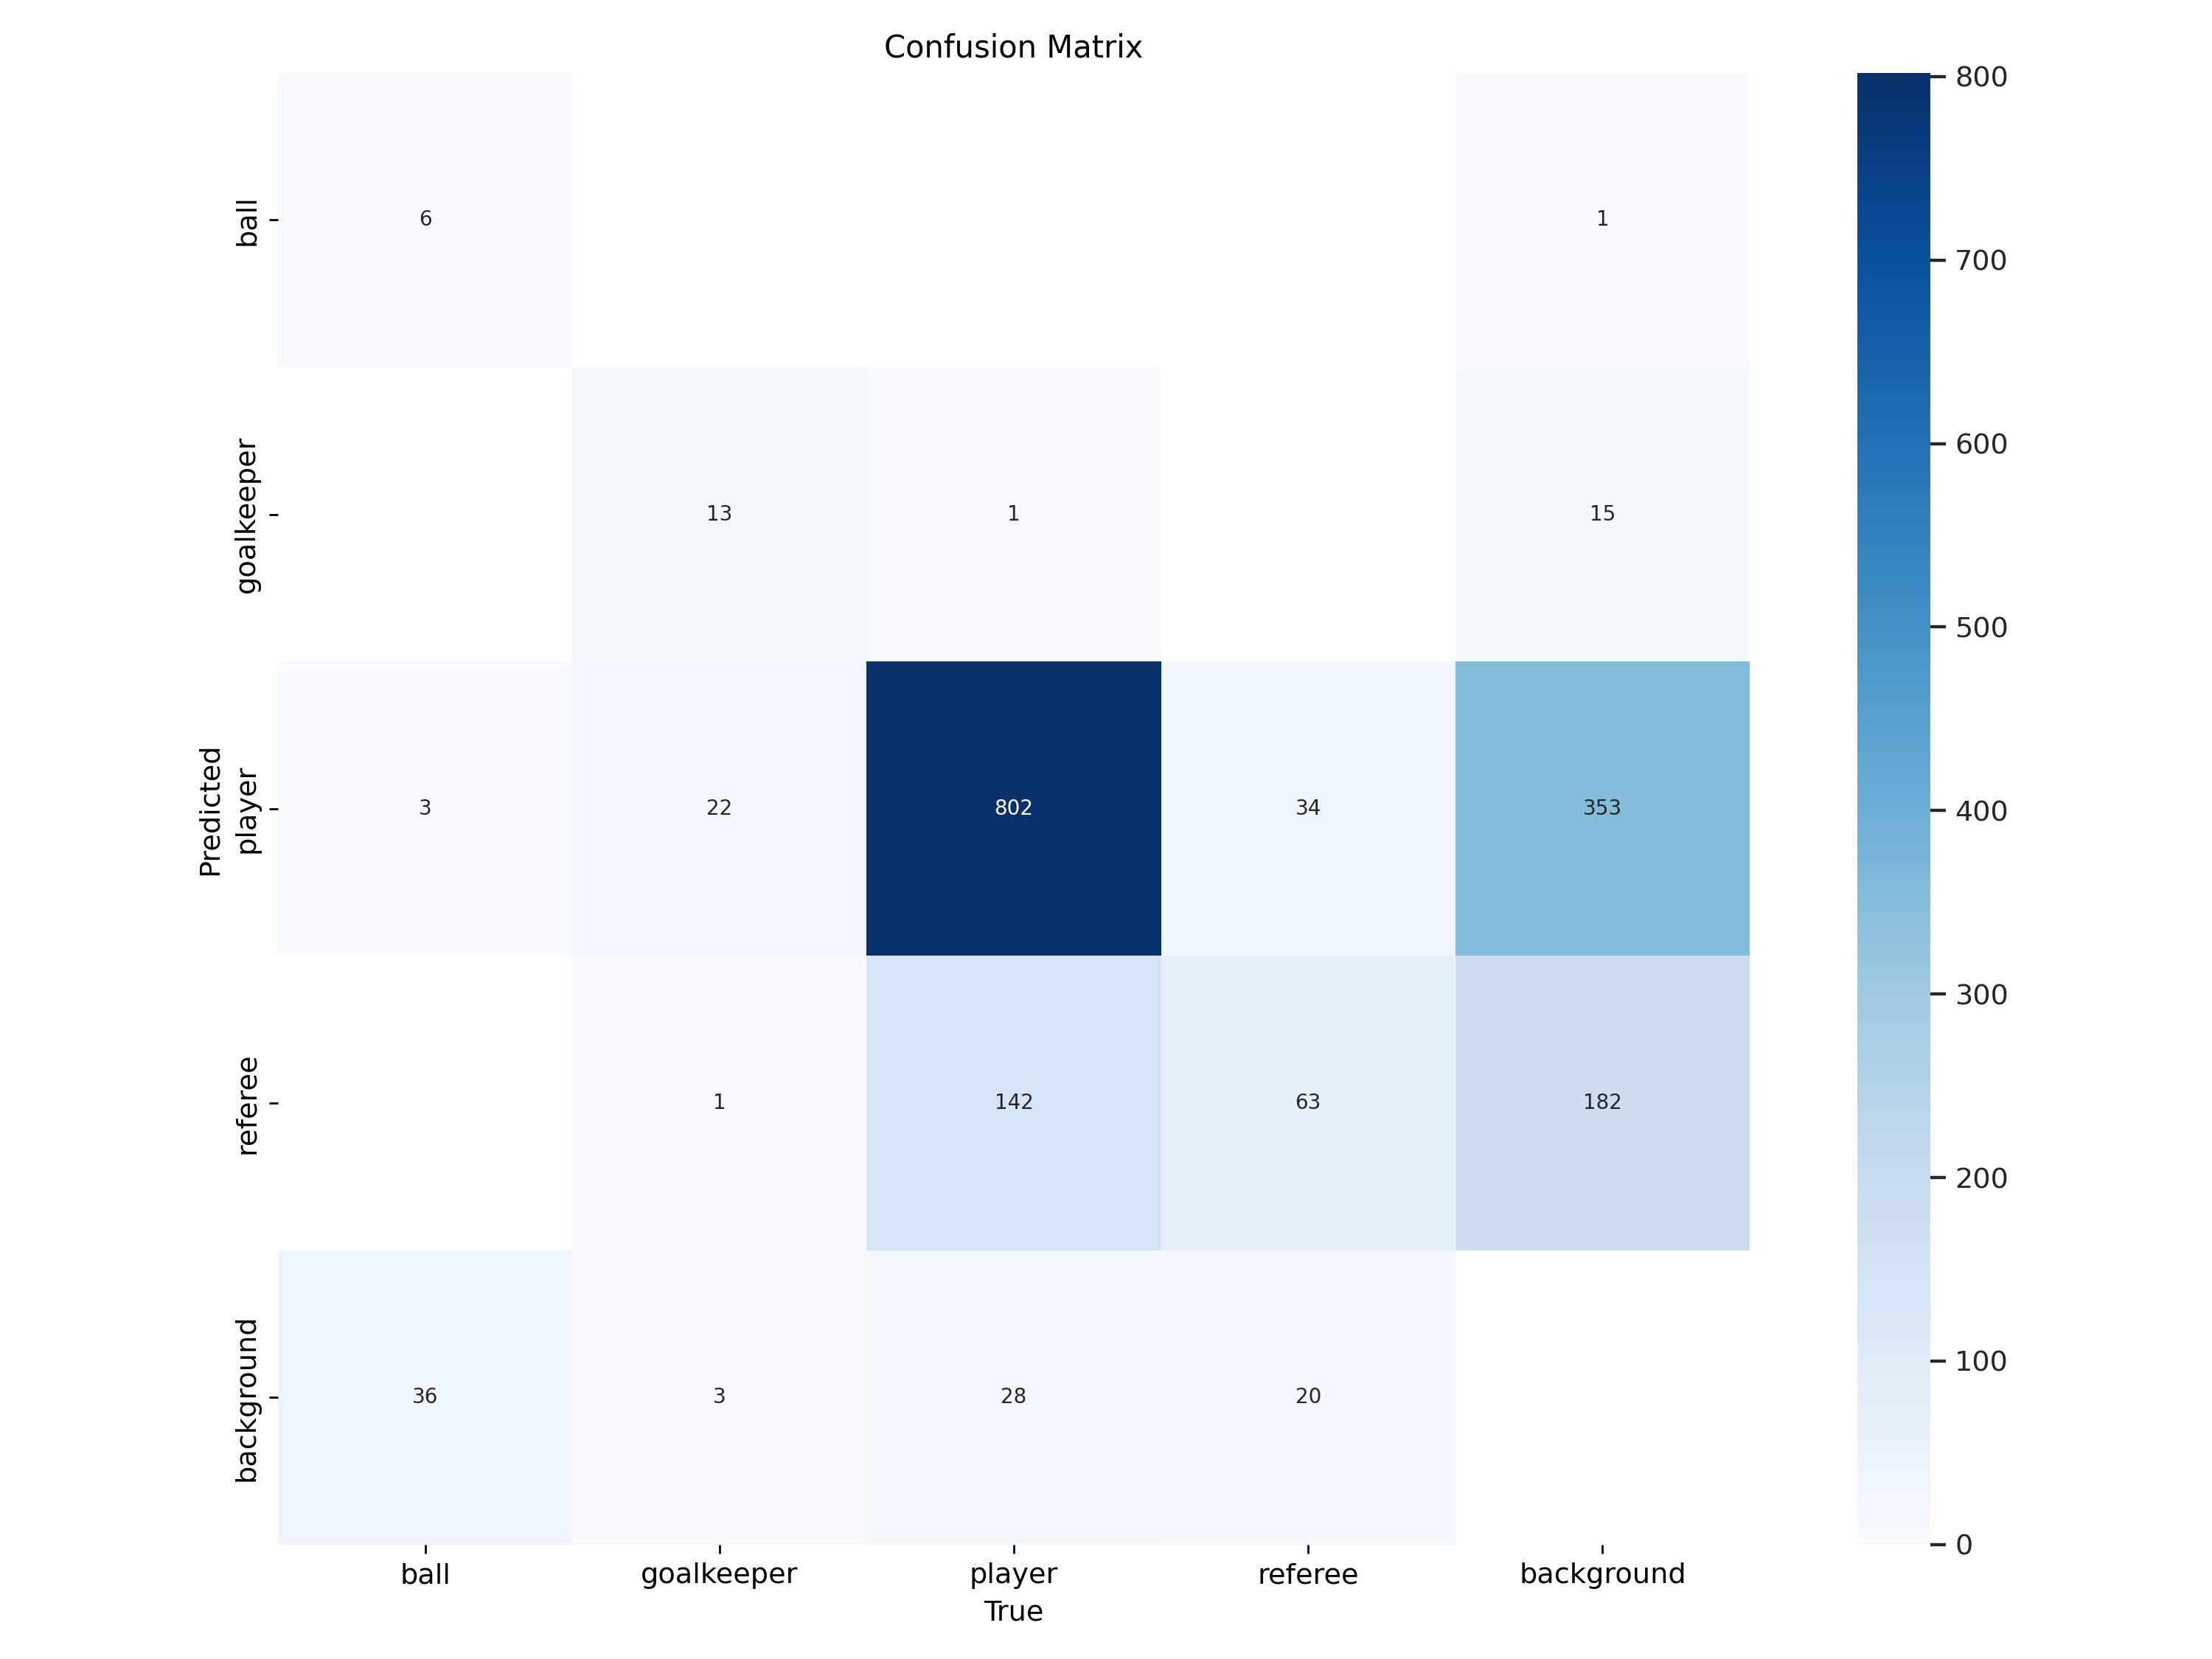

In [28]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


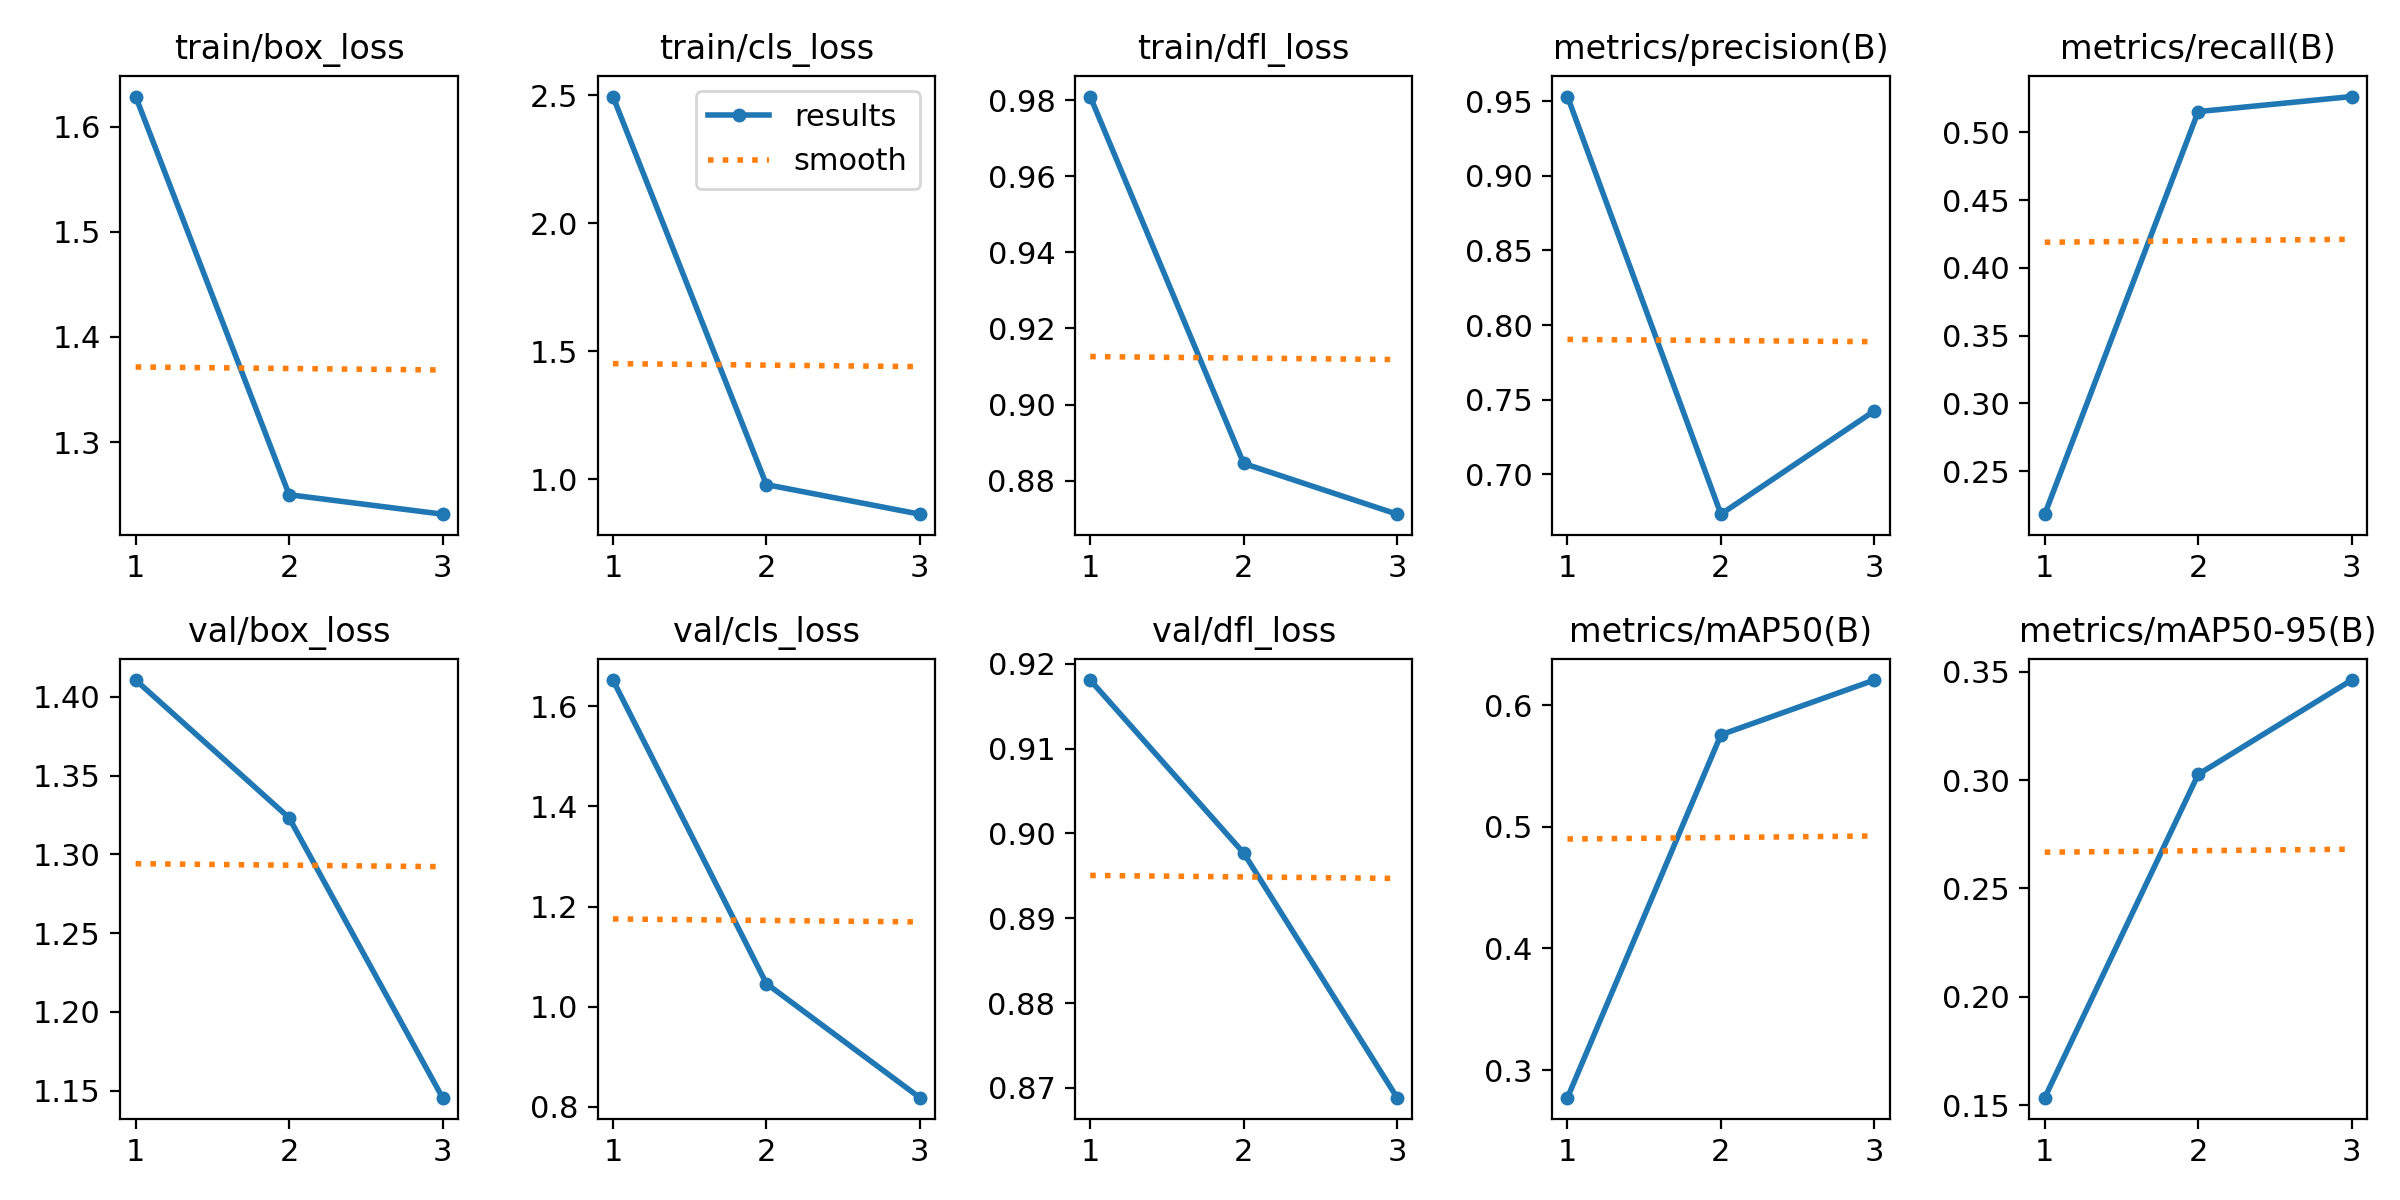

In [29]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


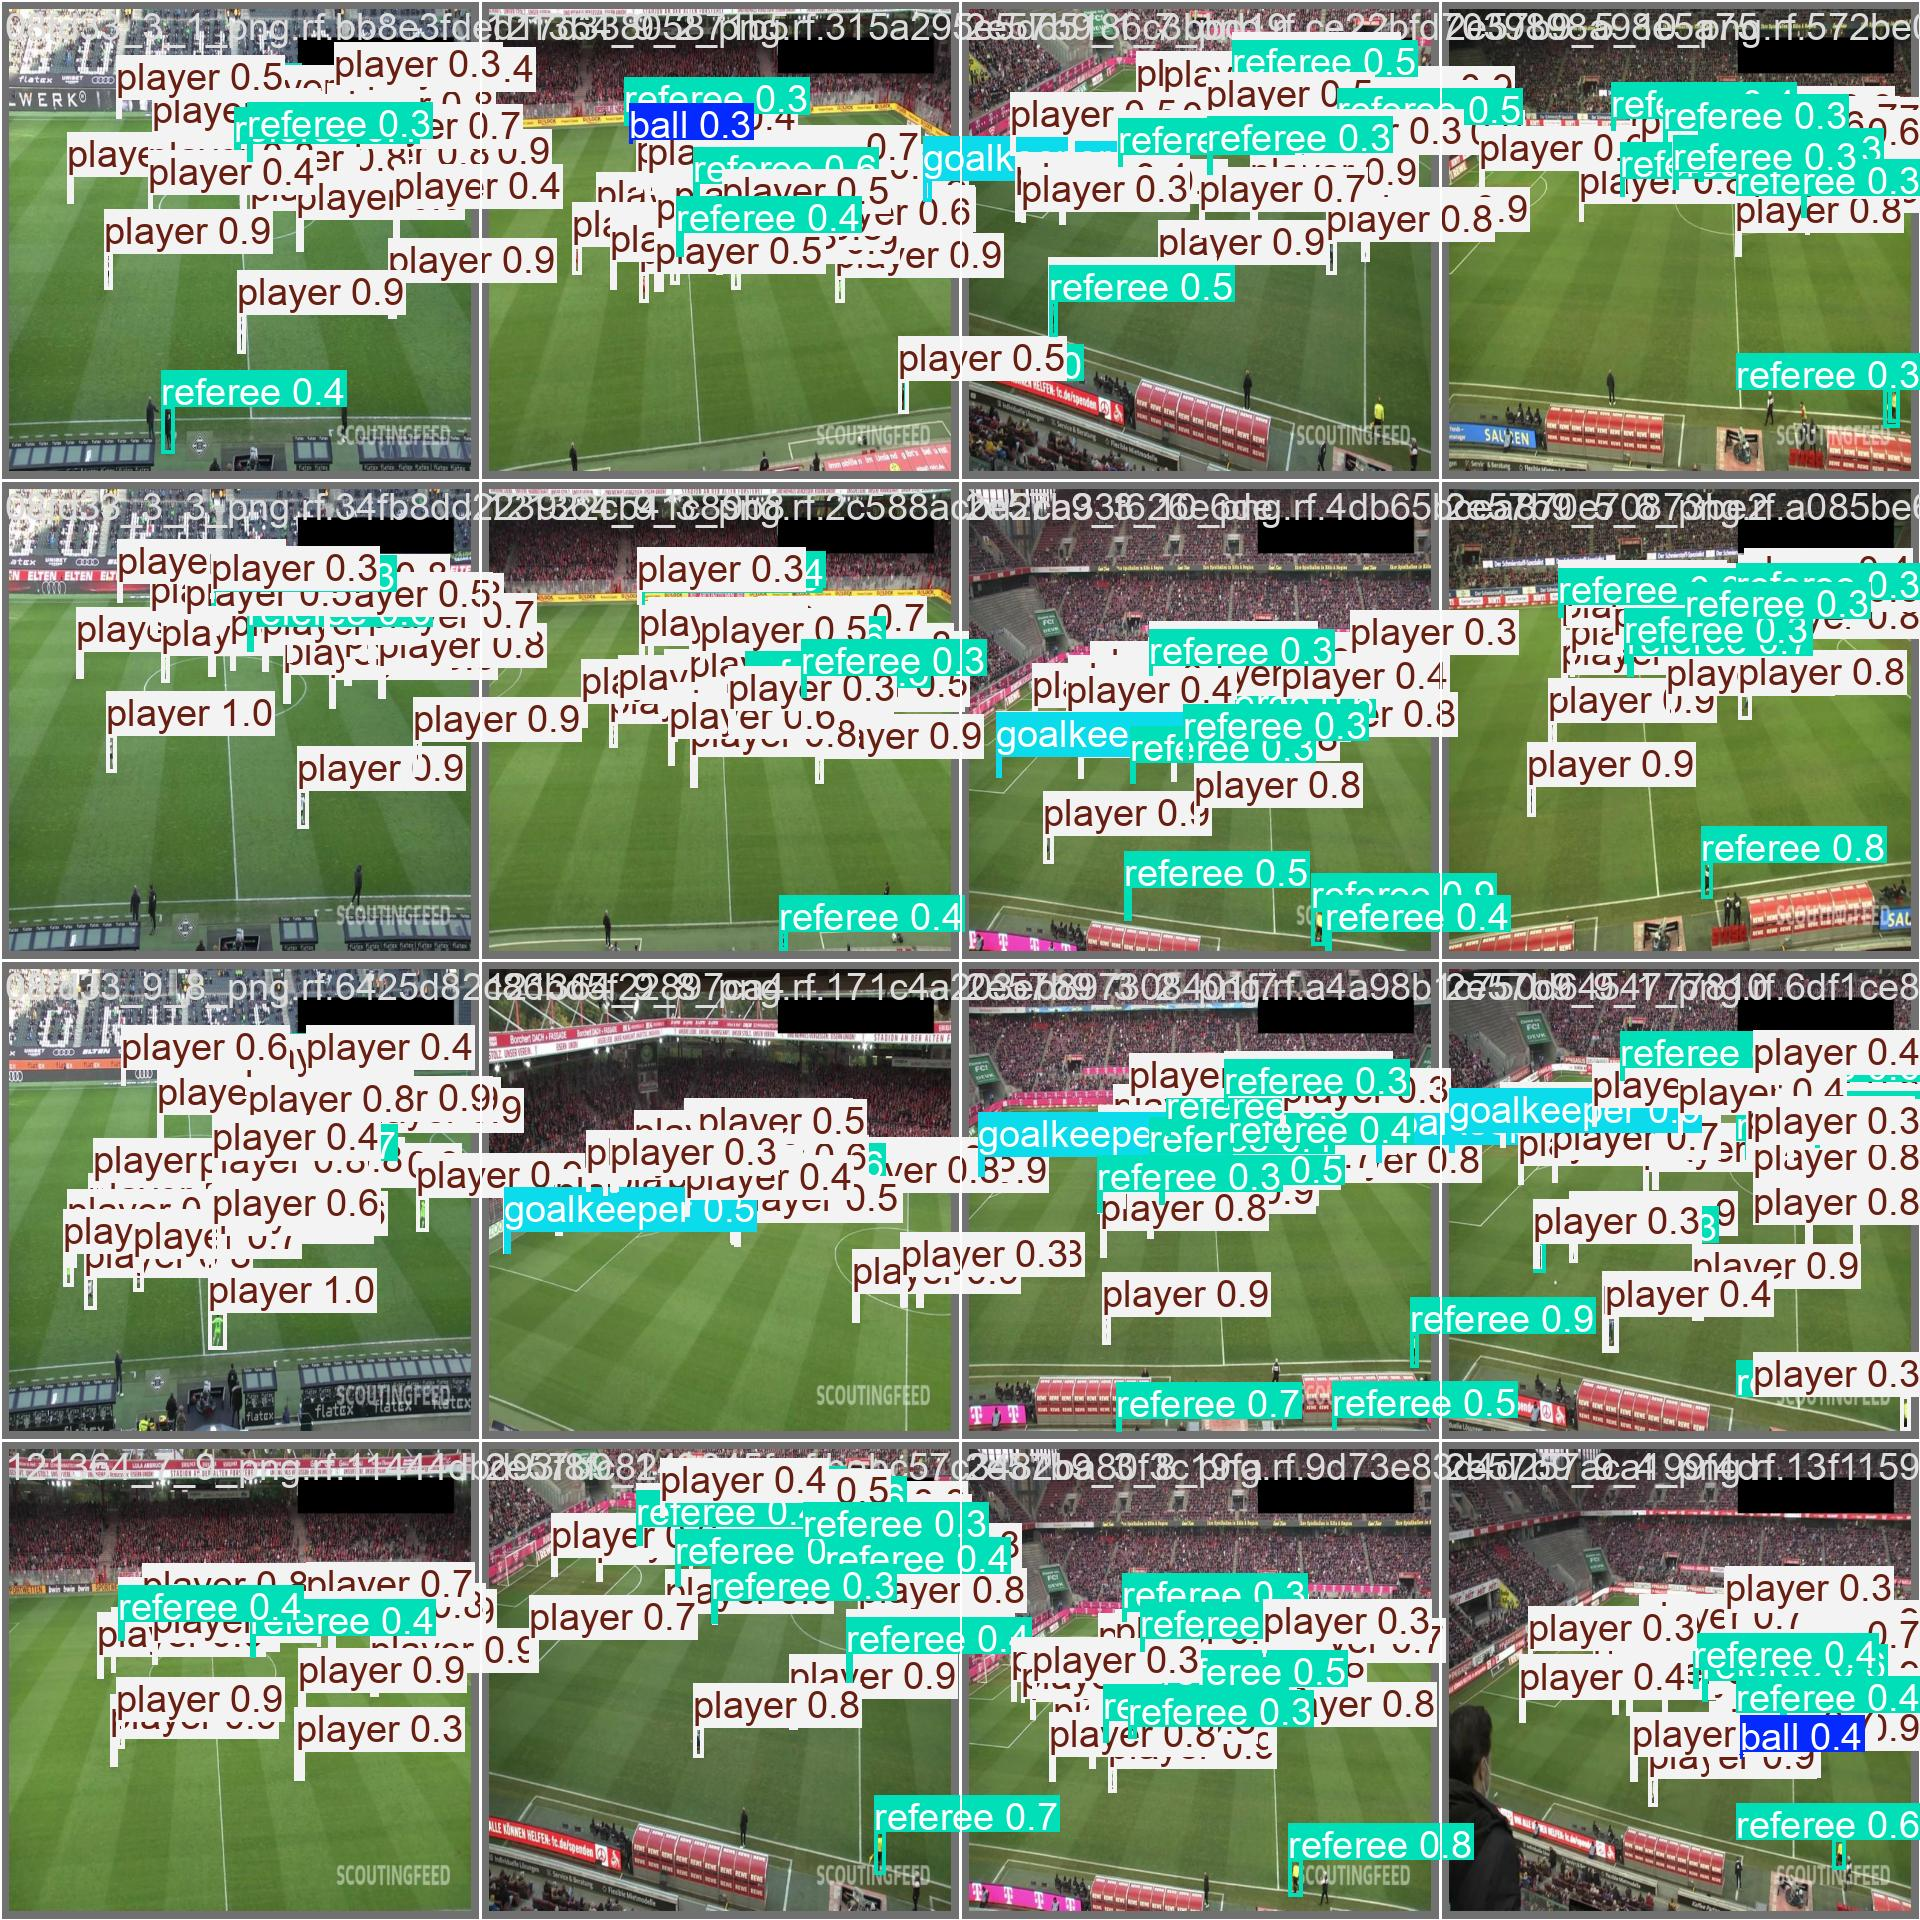

In [30]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [31]:
# Validate

%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/football-players-obj-detection-2/valid/labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100% 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:06<00:00,  1.74s/it]
                   all         49       1174      0.751      0.527      0.624      0.354
                  ball         45         45          1     0.0851      0.365      0.128
            goalkeeper         38         39      0.782      0.436      0.671      0.385
                player         49        973      0.849      0.953      0.945       0.62
               referee         49        117      0.371      0.632      0.517      0.284
Speed: 21.8ms preprocess, 28.8ms inference, 0.2ms loss, 23.5ms postprocess per image
Results saved 

In [32]:
# Inference

%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.2.103 🚀 Python-3.10.12 torch-2.5.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs

image 1/25 /content/datasets/football-players-obj-detection-2/test/images/08fd33_3_6_png.rf.d031da4f257bbf91daf9845051fb9487.jpg: 800x800 1 ball, 21 players, 1 referee, 22.9ms
image 2/25 /content/datasets/football-players-obj-detection-2/test/images/08fd33_9_3_png.rf.509869506accd728341d8426de2f937a.jpg: 800x800 28 players, 22.9ms
image 3/25 /content/datasets/football-players-obj-detection-2/test/images/40cd38_7_6_png.rf.57bcce20df01cee3811f2b3576481f41.jpg: 800x800 25 players, 5 referees, 22.8ms
image 4/25 /content/datasets/football-players-obj-detection-2/test/images/42ba34_1_5_png.rf.ec272c23ac9c73ba68d85a630b6d2a22.jpg: 800x800 24 players, 3 referees, 22.8ms
image 5/25 /content/datasets/football-players-obj-detection-2/test/images/42ba34_5_5_png.rf.3fecd509745cf069d3e57692550f5fa9.jpg: 800x800 22 players

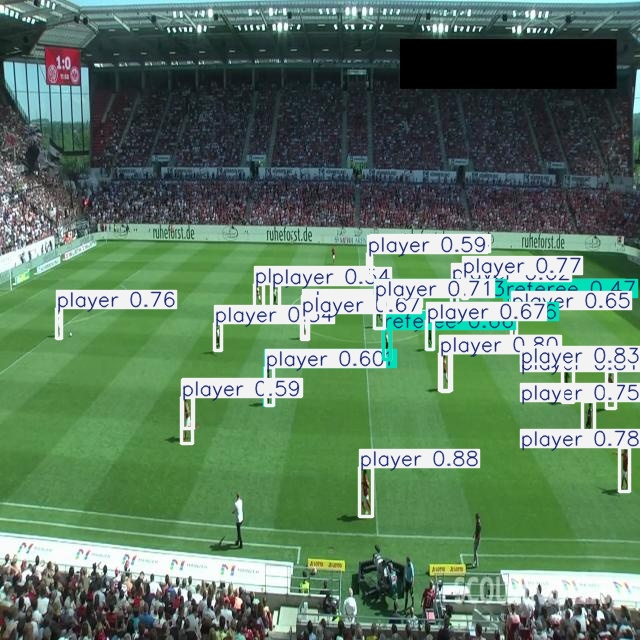

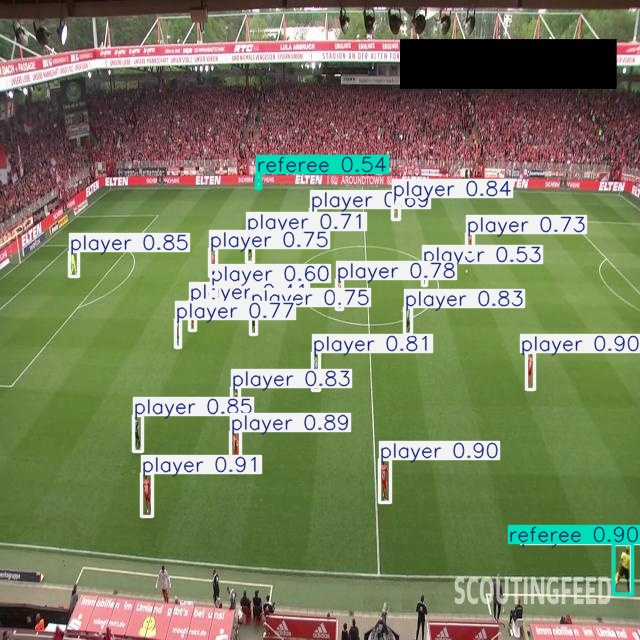

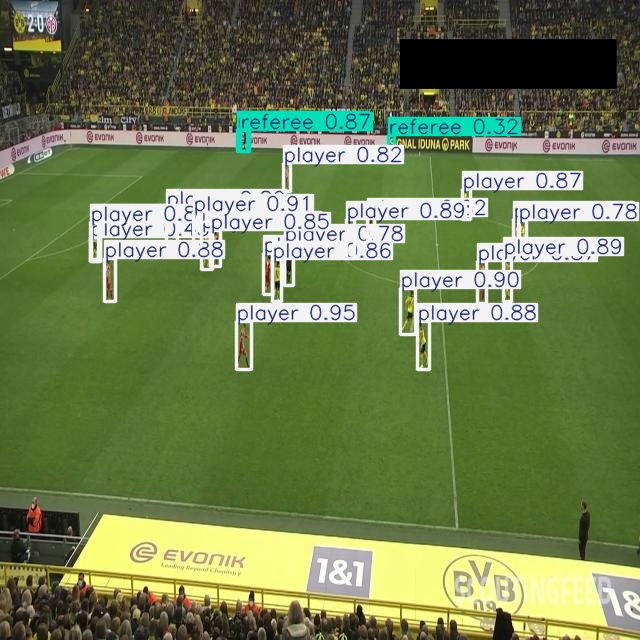

In [33]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

# OTHER

* Bonus
  * Replicate Image Models
  * Roboflow Annoation
  *  